<a href="https://colab.research.google.com/github/Arafath3/PyTorch/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libaries in PyTorch

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [83]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


## 1. Getting a Dataset

The dataset we are using FashionMNIST



In [84]:
# Setup training data

train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [85]:
len(train_data), len(test_data)

(60000, 10000)

In [86]:
image,label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [87]:
class_name = train_data.classes

class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [88]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [89]:
# check the shape of our image
print(f"Image shape: {image.shape} -> [colour_channels, height, width]")
print(f"Image label: {class_name[label]}")

Image shape: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing data

Image shape: torch.Size([1, 28, 28])


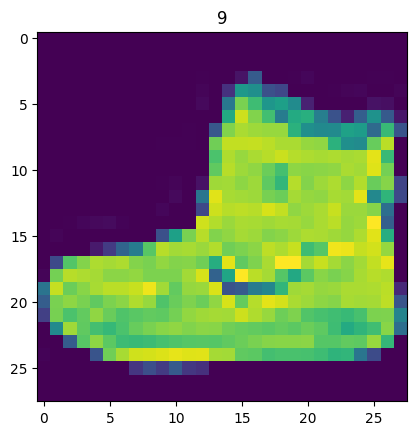

In [90]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

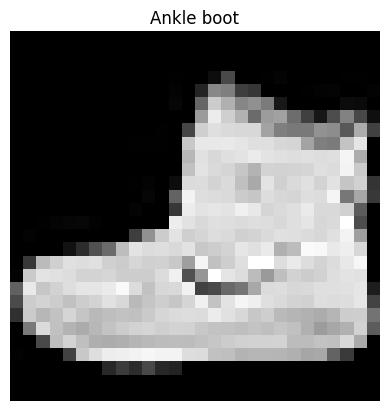

In [91]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False);

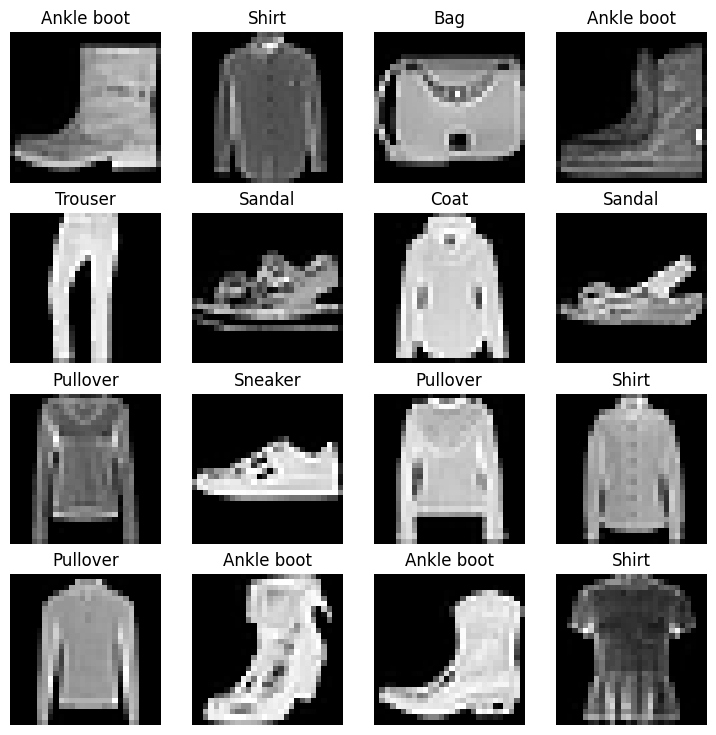

In [92]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)

## 2. Prepare DataLoader

DataLoader turns dataset into a Python iterable

More specifically, we want to turn our data into batchs (or mini-batches)

1. More computationally efficient, as in, computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives neural network more chances to update its gradients per epoch

In [93]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batchs)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f85499a1ab0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85499a1420>)

In [94]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

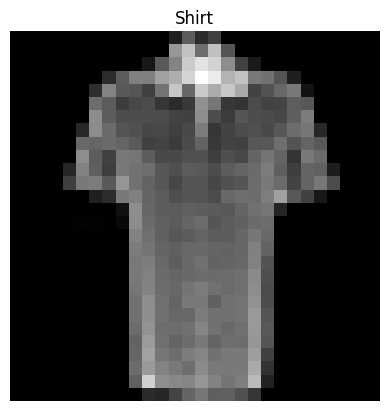

In [95]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_name[label])
plt.axis(False)

## 3. Model 0: build a baseline model

a baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.


In [96]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample

output = flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [97]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [98]:
class FashionMNISTMODELV0(nn.Module):
  def __init__(self, input_shape:int, hidden_unit:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_unit),
        nn.Linear(in_features=hidden_unit, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [99]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTMODELV0(
    input_shape = 784, # this is 28 * 28
    hidden_unit=10, # how many units in the hidden layer
    output_shape = len(class_name) # one for every class

).to("cpu")

model_0

FashionMNISTMODELV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [100]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [101]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem,, let's usee accuracy as our evaluation metric

In [102]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('already exist')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', "wb") as f:
    f.write(request.content)

already exist


In [103]:
from helper_functions import accuracy_fn, plot_decision_boundary

In [104]:
# Setup loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:

1. Model's performace (loss and accuracy values etc)
2. How fast it runs

In [105]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [106]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.070200040790951e-05

### 3.3 Creating  a trianing loop and training a model on batchs of data

1. Loop through epochs.
2. Loop through training batchs, perform training steps, calculate the train loss *per batch*
3. Loop through testing batchs, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).

In [107]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # add a loop to through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss avverage per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

# calculate training time

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train Loss: 0.5904 | Test Loss: 0.5095, Test acc: 82.04%
Epoch: 1
-----
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train Loss: 0.4763 | Test Loss: 0.4799, Test acc: 83.20%
Epoch: 2
-----
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train Loss: 0.4550 | Test Loss: 0.4766, Test acc: 83.43%
Train time on cpu: 45.311 seconds


## 4. Make predictions and get Model 0 results

In [108]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
       # Make predictions
       y_pred = model(X)

       # Accumulate the loss and acc values per batah
       loss += loss_fn(y_pred, y)
       acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"Model_Name": model.__class__.__name__,
          "Model_Loss": loss.item(),
          "Model_acc": acc}



model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

In [109]:
model_0_results

{'Model_Name': 'FashionMNISTMODELV0',
 'Model_Loss': 0.47663894295692444,
 'Model_acc': 83.42651757188499}

## 5. Setup device agnostic-code

In [110]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [111]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 6. Creating a non-linear model

In [112]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)



model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_name)
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Loss function and optimizer

In [113]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 training loop and testing loop

### creating a training and testing loop function

In [114]:
# Training function

def train_step(model: torch.nn.Module,
               train_data,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
     ### training
     train_loss,train_acc = 0, 0
     model.train()
     for batch, (X, y) in enumerate(train_data):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)

        train_loss += loss

        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    # Divide total train loss by length of train dataloader
     train_loss /= len(train_data)
     train_acc /= len(train_data)

     print(f"Train loss: {train_loss:.5f} | Train_acc: {train_acc:.5f}%")



In [115]:
# testing function

def test_step(model: torch.nn.Module,
              test_data,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in test_data:

      X_test, y_test = X_test.to(device), y_test.to(device)
      # 1. forward pass
      test_pred = model(X_test)

      # 2. calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss avverage per batch
    test_loss /= len(test_data)

    # calculate the test acc average per batch
    test_acc /= len(test_data)

    # print
    print(f"Test Loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%\n")

In [116]:
torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  # calling training function
  train_step(model=model_1,
             train_data=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            test_data=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.98248 | Train_acc: 65.06000%
Test Loss: 0.7606, Test acc: 72.80%

Train loss: 0.70366 | Train_acc: 74.48000%
Test Loss: 0.7173, Test acc: 73.67%

Train loss: 0.67375 | Train_acc: 75.30500%
Test Loss: 0.6917, Test acc: 74.81%

Train time on cpu: 44.558 seconds


In [117]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  loss, acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
       # Make predictions
       X,y = X.to(device), y.to(device)
       y_pred = model(X)

       # Accumulate the loss and acc values per batah
       loss += loss_fn(y_pred, y)
       acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"Model_Name": model.__class__.__name__,
          "Model_Loss": loss.item(),
          "Model_acc": acc}



In [118]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)

In [119]:
model_1_results

{'Model_Name': 'FashionMNISTModelV1',
 'Model_Loss': 0.6917040348052979,
 'Model_acc': 74.810303514377}

## Model 2: building a Convolutional Neural Network

CNN's are knows as ConvNets


In [120]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1

        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units *7 * 7,
                  out_features=output_shape)

    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    return self.classifier_layer(x)

In [121]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping throught `nn.Conv2D`

In [122]:
torch.manual_seed(42)

# Create a batch of imagess
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image: \n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test Image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.79

In [123]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))

In [124]:
conv_output = conv_layer(test_image)

conv_output, conv_output.shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

### 7.2 Stepping through `nn.maxpool2d`

In [125]:
print(f"Test image original shape: {test_image.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)
print(f"Shape after going throught conv_layer(): {test_image_through_conv.shape}")

test_image_through_con_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_con_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going throught conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


In [126]:
torch.manual_seed

# Create a random tensor with a similar number of dimension to our image

random_image = torch.randn(size=(1, 1,2,2))

### 7.2.1 trying model 2

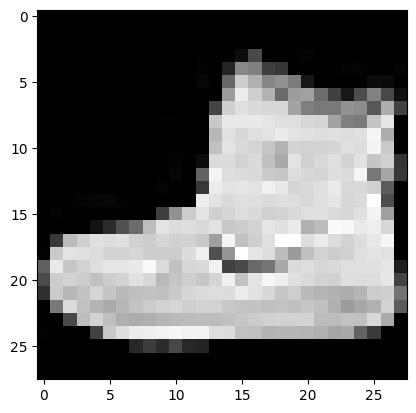

In [127]:
plt.imshow(image.squeeze(), cmap="gray");

### 7.3 Setup a loss function and optimizer for `model_2`

In [128]:
loss_fn = nn.CrossEntropyLoss()
from helper_functions import accuracy_fn

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [129]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [130]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_model_2 = timer()
epochs = 3


for epoch in tqdm(range(epochs)):
  train_step(model=model_2,
             train_data=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            test_data=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time = print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.59518 | Train_acc: 78.37500%
Test Loss: 0.3950, Test acc: 85.99%

Train loss: 0.36536 | Train_acc: 86.90167%
Test Loss: 0.3524, Test acc: 86.91%

Train loss: 0.32588 | Train_acc: 88.12833%
Test Loss: 0.3272, Test acc: 88.07%

Train time on cpu: 245.586 seconds


In [131]:
model_2_results = eval_model(model_2, test_dataloader,loss_fn, accuracy_fn, device)

model_2_results

{'Model_Name': 'FashionMNISTModelV2',
 'Model_Loss': 0.32718968391418457,
 'Model_acc': 88.06908945686901}

In [132]:
model_0_results

{'Model_Name': 'FashionMNISTMODELV0',
 'Model_Loss': 0.47663894295692444,
 'Model_acc': 83.42651757188499}

## 8. Compare model results and training Time

In [133]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,Model_Name,Model_Loss,Model_acc
0,FashionMNISTMODELV0,0.476639,83.426518
1,FashionMNISTModelV1,0.691704,74.810304
2,FashionMNISTModelV2,0.327190,88.069089


In [134]:
# Add training time tp results comparisopn
compare_results["training Time"] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time
]

In [135]:
compare_results

,Model_Name,Model_Loss,Model_acc,training Time
0,FashionMNISTMODELV0,0.476639,83.426518,45.310850
1,FashionMNISTModelV1,0.691704,74.810304,44.558047
2,FashionMNISTModelV2,0.327190,88.069089,245.586477


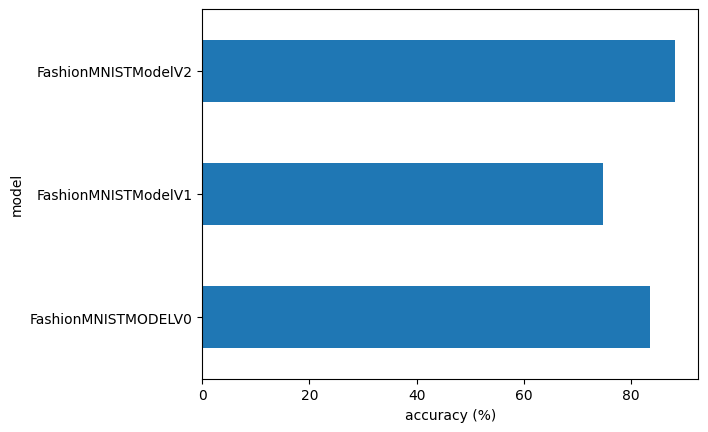

In [136]:
compare_results.set_index("Model_Name")["Model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [137]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Get prediction probability (logits -> prediction probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [138]:
import random

# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

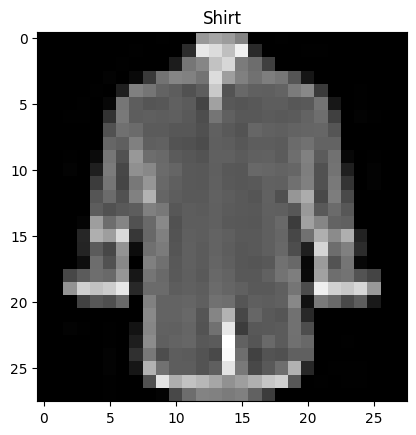

In [139]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_name[test_labels[0]]);

In [140]:
# Make predictions

pred_probs = make_prediction(model=model_2, data=test_samples)

pred_probs[:2]

tensor([[7.0230e-03, 2.5278e-05, 6.2146e-04, 2.1233e-03, 9.3983e-02, 9.6116e-06,
         8.9599e-01, 7.1119e-07, 2.0875e-04, 1.3200e-05],
        [8.0385e-03, 7.8576e-06, 6.6847e-03, 5.9315e-06, 3.4679e-04, 2.6626e-04,
         1.2168e-02, 6.0639e-04, 9.7162e-01, 2.5325e-04]])

In [141]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 8, 2, 1, 5, 9, 0, 6, 3])

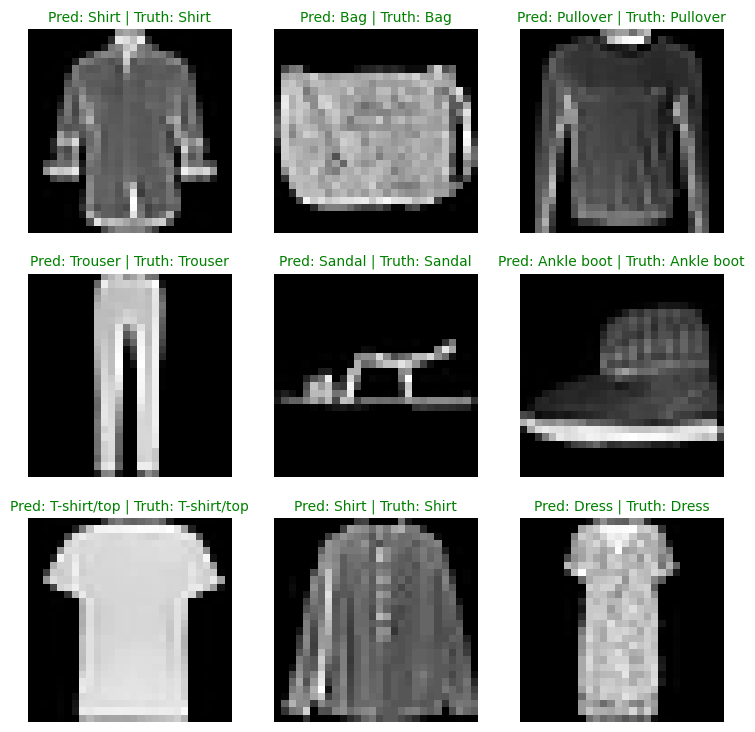

In [142]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form)

  truth_label = class_name[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 10. Making confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix - `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix `mlxtend.plotting.plot_confusion_matrix()`

In [143]:
import mlxtend

In [144]:
mlxtend.__version__

'0.22.0'

In [149]:
# 1. Make predictions with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
      # Send the data and targets to target device
      X, y = X.to(device), y.to(device)
      # Do the forward pass
      y_logits = model_2(X)
      # Turn predictions from logits -> predictions probabilities -> prediction labels
      y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
      # Put prediction on CPU for evaluation
      y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [150]:
len(y_pred_tensor)

10000

In [151]:
# See if require packages are installed and if not, install them..

try:
  import torchmetrics, mlxtend

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.2 MB/s eta 0:00:00


In [152]:
mlxtend.__version__

'0.22.0'

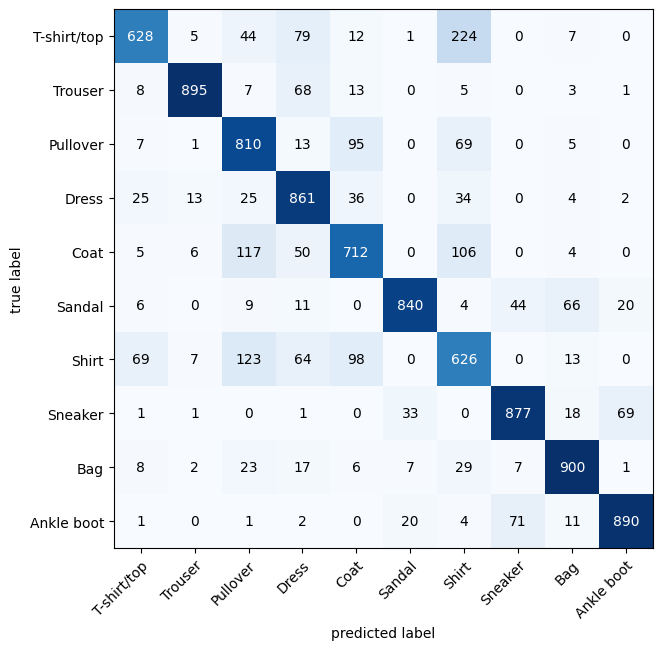

In [157]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_name))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names =class_name,
    figsize=(10, 7)
)

In [156]:
confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

## 11. Save and load best performing model

In [161]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "Computer vision.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)